# 1.) Import the data from CCLE into a new Google Colab file

In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [4]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [8]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/insurance.csv")

In [11]:
### Change category "sex' into binary category
df.loc[df["sex"] == "female","sex"] = 1.
df.loc[df["sex"] == "male","sex"] = 0.

### Change category "smoker" into binary category
df.loc[df["smoker"] == "yes","smoker"] = 1.
df.loc[df["smoker"] == "no","smoker"] = 0.

In [18]:
from sklearn import preprocessing

In [22]:
### Change category "region" into binary category
le = preprocessing.LabelEncoder()

In [23]:
le.fit(df["region"])

LabelEncoder()

In [24]:
list(le.classes_)

['northeast', 'northwest', 'southeast', 'southwest']

In [25]:
df["region"] = le.transform(df["region"])

In [26]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1.0,27.900,0,1.0,3,16884.92400
1,18,0.0,33.770,1,0.0,2,1725.55230
2,28,0.0,33.000,3,0.0,2,4449.46200
3,33,0.0,22.705,0,0.0,1,21984.47061
4,32,0.0,28.880,0,0.0,1,3866.85520


# 2.) Split the data into 80/20, in/out sample

In [38]:
import numpy as np

In [39]:
data = np.array(df.iloc[:, :-1])
target = np.array(df.iloc[:, -1])

In [40]:
cut = int((len(data) * .8) // 1)

In [41]:
in_data = data[:cut]
out_data = data[cut:]

in_target = target[:cut]
out_target = target[cut:]

# 3.) Normalize the Data

In [42]:
from sklearn import preprocessing

In [43]:
scaler = preprocessing.StandardScaler().fit(in_data)

in_data_scale = scaler.transform(in_data)

out_data_scale = scaler.transform(out_data)

# 4.) Get lambda from Lasso cross validation

In [44]:
# Import LassoCV
from sklearn.linear_model import LassoCV

modCV = LassoCV().fit(in_data_scale, in_target)

In [45]:
modCV.alpha_

133.34880015958146

In [46]:
a = modCV.alpha_

# 5.) Run a lasso regression with that Lambda

In [48]:
# Use Lasso
from sklearn import linear_model

In [49]:
mod1 = linear_model.Lasso(alpha=a).fit(in_data_scale, in_target)

In [50]:
mod1.predict(np.array(in_data_scale))

array([24933.78011265,  3864.47297708,  6815.10290666, ...,
       12177.79520243, 11741.14195836, 12360.55112834])

In [51]:
mod1.coef_

array([3564.26137833,    0.        , 1890.8527485 ,  398.24050447,
       9324.84227138, -326.52198757])

# 6.) Visualize the coefficients 

In [62]:
coefs = np.array(mod1.coef_)

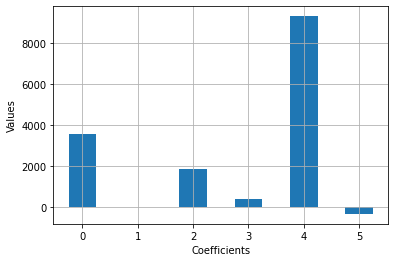

In [72]:
plt.bar(np.arange(0,6), coefs, 0.5)

plt.xlabel("Coefficients")
plt.ylabel("Values")
plt.grid()

# 7.) Interpret the coefficients

In [ ]:
# Age,Bmi,Children and Smoker have positive effects on Charges.
# Region has a negative effect on Charges, while Sex has no effect on Charges

# 8.) Compare in and out of sample MSE’s

In [ ]:
#mod1.predict("in sample data")
#mod1.predict("out of sample data")

In [79]:
# Calculate the predicted in-sample data

predicted_in_target = mod1.predict(in_data_scale)

In [80]:
# Calculate the predicted out-of-sample data

predicted_out_of_target = mod1.predict(out_data_scale)

In [85]:
from sklearn.metrics import mean_squared_error


In [86]:
# Calculate the MSE for in-sample data

y_true = in_target
y_pred = predicted_in_target
mean_squared_error(y_true, y_pred)

36490415.101693384

In [87]:
# Calculate the MSE for out-of-sample data

y_true = out_target
y_pred = mod1.predict(out_data_scale)
mean_squared_error(y_true, y_pred)

37252730.724018715